## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



Name : Mustafa GENÇ





------CAR------


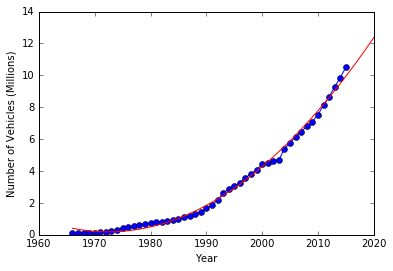

CAR Prediction 2016 : 10.404812
CAR Prediction 2017 : 10.879243
CAR Prediction 2018 : 11.364441
CAR Prediction 2019 : 11.860404
CAR Prediction 2020 : 12.367133




------MINIBUS------


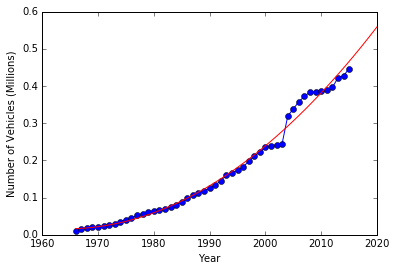

MINIBUS Prediction 2016 : 0.483840
MINIBUS Prediction 2017 : 0.502097
MINIBUS Prediction 2018 : 0.520703
MINIBUS Prediction 2019 : 0.539658
MINIBUS Prediction 2020 : 0.558963




------BUS------


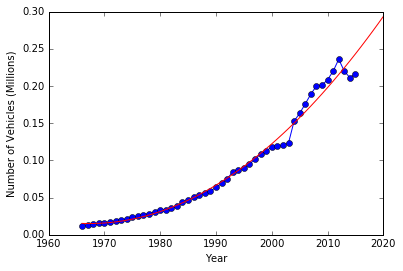

BUS Prediction 2016 : 0.252913
BUS Prediction 2017 : 0.262782
BUS Prediction 2018 : 0.272852
BUS Prediction 2019 : 0.283123
BUS Prediction 2020 : 0.293595




------SMALL_TRUCK------


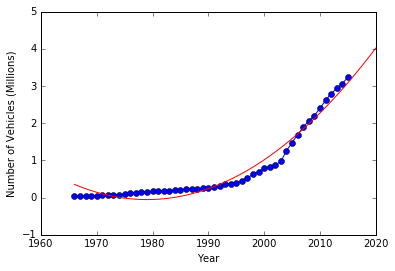

SMALL_TRUCK Prediction 2016 : 3.262305
SMALL_TRUCK Prediction 2017 : 3.443931
SMALL_TRUCK Prediction 2018 : 3.630400
SMALL_TRUCK Prediction 2019 : 3.821712
SMALL_TRUCK Prediction 2020 : 4.017867




------TRUCK------


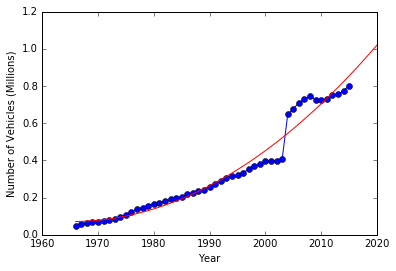

TRUCK Prediction 2016 : 0.886185
TRUCK Prediction 2017 : 0.918705
TRUCK Prediction 2018 : 0.951860
TRUCK Prediction 2019 : 0.985652
TRUCK Prediction 2020 : 1.020081




------MOTORCYCLE------


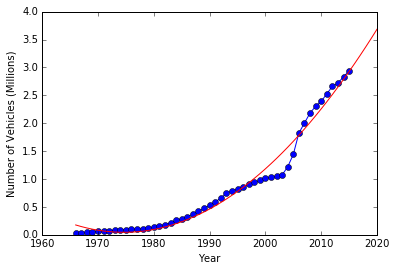

MOTORCYCLE Prediction 2016 : 3.070448
MOTORCYCLE Prediction 2017 : 3.218510
MOTORCYCLE Prediction 2018 : 3.370109
MOTORCYCLE Prediction 2019 : 3.525244
MOTORCYCLE Prediction 2020 : 3.683916




------SPECIAL_VEHICLES------


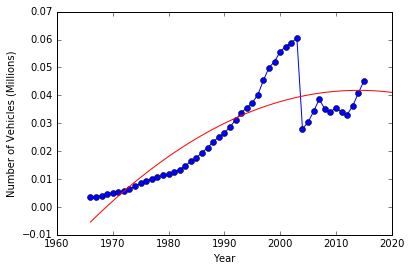

SPECIAL_VEHICLES Prediction 2016 : 0.041699
SPECIAL_VEHICLES Prediction 2017 : 0.041599
SPECIAL_VEHICLES Prediction 2018 : 0.041459
SPECIAL_VEHICLES Prediction 2019 : 0.041277
SPECIAL_VEHICLES Prediction 2020 : 0.041054




------MACHINERY------


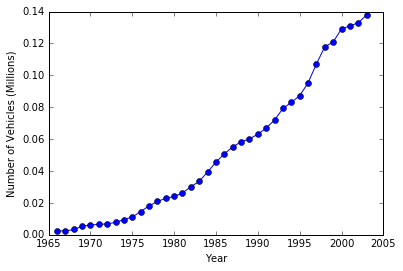

MACHINERY Prediction 2016 : nan
MACHINERY Prediction 2017 : nan
MACHINERY Prediction 2018 : nan
MACHINERY Prediction 2019 : nan
MACHINERY Prediction 2020 : nan




------TRACTOR------


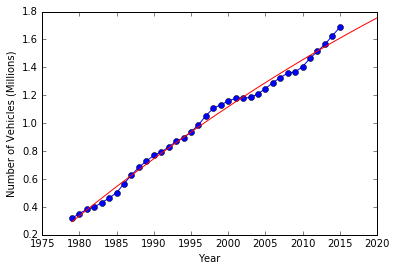

TRACTOR Prediction 2016 : 1.638924
TRACTOR Prediction 2017 : 1.668403
TRACTOR Prediction 2018 : 1.697520
TRACTOR Prediction 2019 : 1.726275
TRACTOR Prediction 2020 : 1.754667


In [74]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

K = 3
BaseYear = 1966
PredictionBaseYear = 2016
data_vehicle = pd.read_csv(u'data/vehicle.csv', sep=';')

x_predict = np.vstack([2016, 2017, 2018, 2019, 2020]) - BaseYear

def predict(vehicles, years, vehicle_type):
    A = np.hstack((np.power(years, i) for i in range(K + 1)))
    y_car = np.matrix(vehicles).T/1000000.0
    w_star_car = (A.T * A).I * A.T * y_car
    
    A_predict = np.hstack((np.power(x_predict, i) for i in range(K + 1)))
    y_predict_car = A_predict * w_star_car
    
    x_all_car = np.vstack([years, x_predict])
    y_all_car = np.vstack([A * w_star_car, y_predict_car])
    
    print "\n"
    print "\n"
    print "------" + vehicle_type + "------"
    plt.plot(years + BaseYear, y_car, 'o-')
    plt.xlabel("Year")
    plt.ylabel("Number of Vehicles (Millions)")
    
    plt.plot(x_all_car + BaseYear, y_all_car, "r-")
    plt.show()

    for i in range(5): 
        print vehicle_type + " Prediction %d : %f" % (i + PredictionBaseYear, y_predict_car[i]) 
    return

x = np.matrix(data_vehicle.Year).T - BaseYear
predict(data_vehicle.Car, x, "CAR")
predict(data_vehicle.Minibus, x, "MINIBUS")
predict(data_vehicle.Bus, x, "BUS")
predict(data_vehicle.SmallTruck, x, "SMALL_TRUCK")
predict(data_vehicle.Truck, x, "TRUCK")
predict(data_vehicle.Motorcycle, x, "MOTORCYCLE")
predict(data_vehicle.SpecialVehicles, x, "SPECIAL_VEHICLES")
# no prediction actually, no data after 2004 for machinery
predict(data_vehicle.Machinery, x, "MACHINERY")
predict(data_vehicle.Tractor[13:], x[13:], "TRACTOR")

